In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
from matplotlib.dates import DateFormatter
import pandas as pd

In [29]:
# Code to import and plot Italy Covid Data
covid_italy=pd.read_csv("./owid-covid-data.csv")
covid_italy=covid_italy.query("location == 'Italy'")
covid_italy

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
70599,ITA,Europe,Italy,2020-01-31,2.0,2.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
70600,ITA,Europe,Italy,2020-02-01,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
70601,ITA,Europe,Italy,2020-02-02,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,-6878.1,-9.02,-6.19,-113.93719
70602,ITA,Europe,Italy,2020-02-03,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
70603,ITA,Europe,Italy,2020-02-04,2.0,0.0,NaN,NaN,NaN,NaN,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71311,ITA,Europe,Italy,2022-01-12,7971068.0,196205.0,173576.143,139872.0,313.0,228.000,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
71312,ITA,Europe,Italy,2022-01-13,8155645.0,184577.0,168597.143,140188.0,316.0,244.857,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
71313,ITA,Europe,Italy,2022-01-14,8356514.0,200869.0,181821.714,140548.0,360.0,264.429,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN
71314,ITA,Europe,Italy,2022-01-15,8549450.0,192936.0,181164.714,140856.0,308.0,282.143,...,19.8,27.8,NaN,3.18,83.51,0.892,NaN,NaN,NaN,NaN


In [30]:
# Change date formats in the DataFrame, and reorder so that the most recent data are last
covid_italy['date']=pd.to_datetime(covid_italy['date'])
covid_italy=covid_italy[::-1]
covid_italy.reset_index(drop=True, inplace=True)


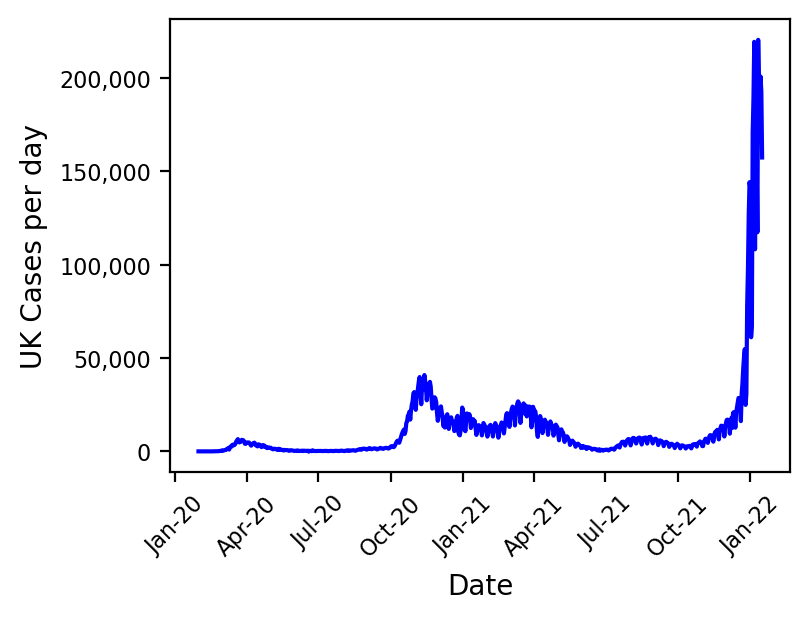

In [31]:
# Plot
fig, ax1 = plt.subplots(figsize = [4,3], dpi=200)
ax1.plot(covid_italy['date'], 
         covid_italy['new_cases'], 
         label='Full data', 
         color='b'
         )

# Format the axes
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('UK Cases per day', fontsize=10)
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='center')

# this code adds a comma at the thousand separator on the y-axis
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# these two lines are used to set the date format to MMM-YY
date_form = DateFormatter("%b-%y")       
ax1.xaxis.set_major_formatter(date_form)


plt.savefig('covid_italy',dpi=300,bbox_inches='tight')
plt.show()

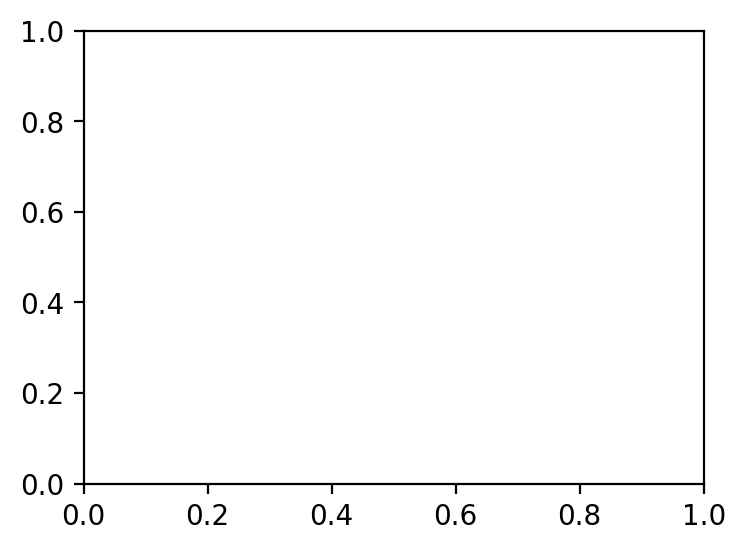

In [32]:
# Death cases in Italy
fig2, ax2 = plt.subplots(figsize = [4,3], dpi=200)
ax1.plot(covid_italy['date'], 
         covid_italy['new_deaths'], 
         label='Full data', 
         color='r'
         )

# Format the axes
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Italy new deaths per day', fontsize=10)
ax1.set_xticks(ax1.get_xticks())
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='center')

# this code adds a comma at the thousand separator on the y-axis
ax1.get_yaxis().set_major_formatter(tkr.FuncFormatter(lambda x, p: format(int(x), ',')))

# these two lines are used to set the date format to MMM-YY
date_form = DateFormatter("%b-%y")       
ax1.xaxis.set_major_formatter(date_form)